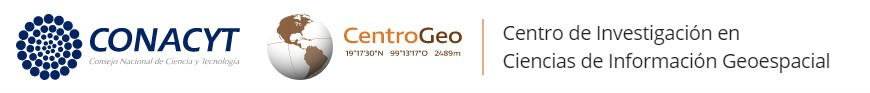
# CentroGeo
## Maestria en Ciencias en Información Geoespacial.
## Aprendizaje de Máquina.
#### Tarea 04
#### @date 2024-05-25
#### @autor: Uriel Mendoza

Se importan la librerias necesarias

In [2]:
import random
import matplotlib.pyplot as plt

Se generar datos aleatorios para probar las regresiones

In [3]:
random.seed(0)
X = [[2 * random.random()] for _ in range(100)]
y = [[4 + 3 * x[0] + random.gauss(0, 1)] for x in X]

Se añade una columna de unos para el término de sesgo

In [4]:
X_b = [[1] + x for x in X]

Se dividen los datos en entrenamiento y prueba

In [5]:
train_ratio = 0.8
train_size = int(train_ratio * len(X_b))
X_train = X_b[:train_size]
y_train = y[:train_size]
X_test = X_b[train_size:]
y_test = y[train_size:]

Se define la función de traspuesta de una matriz

In [6]:
def transpose(matrix):
    return list(map(list, zip(*matrix)))

Se define la función para multiplicar matrices

In [7]:
def matmul(A, B):
    result = [[sum(a * b for a, b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]
    return result

Se define la función para calcular la inversa de una matriz 2x2

In [8]:
def inverse_2x2(matrix):
    a, b, c, d = matrix[0][0], matrix[0][1], matrix[1][0], matrix[1][1]
    det = a * d - b * c
    if det == 0:
        raise ValueError("Matrix is not invertible")
    return [[d / det, -b / det], [-c / det, a / det]]

Se define la regresión Lineal Básica por minimos cuadrados

In [9]:
XtX = matmul(transpose(X_train), X_train)
XtX_inv = inverse_2x2(XtX)
XtY = matmul(transpose(X_train), y_train)
theta_best = matmul(XtX_inv, XtY)

Se define la regresión Ridge dada la expresion

In [10]:
lambda_param = 1.0
I = [[1, 0], [0, 1]]
XtX_ridge = [[XtX[i][j] + (lambda_param if i == j else 0) for j in range(2)] for i in range(2)]
XtX_ridge_inv = inverse_2x2(XtX_ridge)
theta_ridge = matmul(XtX_ridge_inv, XtY)

Se generan las predicciones

In [11]:
y_pred_lin = matmul(X_test, theta_best)
y_pred_ridge = matmul(X_test, theta_ridge)

Se Imprimen los coeficientes de regresion

In [12]:
print("Coeficientes de la regresión lineal básica:", [coef[0] for coef in theta_best])
print("Coeficientes de la regresión Ridge:", [coef[0] for coef in theta_ridge])

Coeficientes de la regresión lineal básica: [4.620108000898917, 2.5314096396441244]
Coeficientes de la regresión Ridge: [4.445346938108166, 2.636987271478464]


Se realiza la gráfica de los resultados

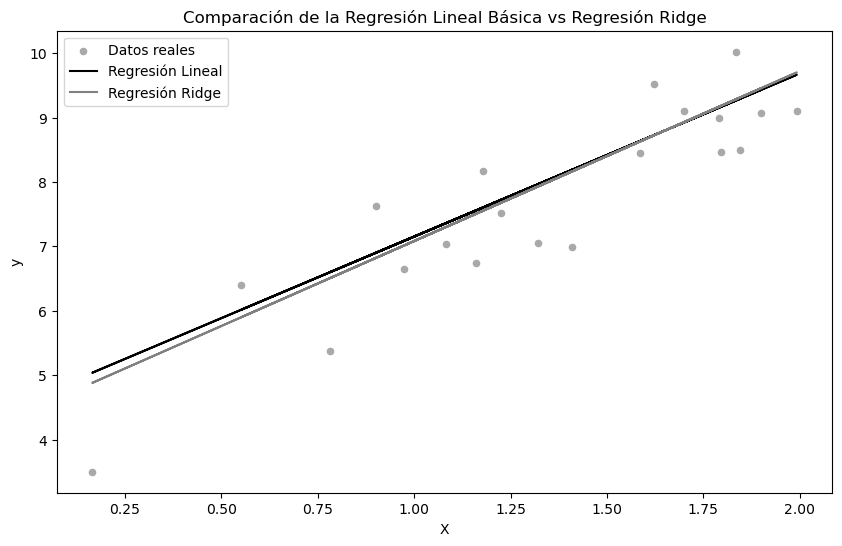

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter([x[1] for x in X_test], [y[0] for y in y_test], color="darkgrey", s=20, label="Datos reales")
plt.plot([x[1] for x in X_test], [y[0] for y in y_pred_lin], color="black", label="Regresión Lineal")
plt.plot([x[1] for x in X_test], [y[0] for y in y_pred_ridge], color="grey", label="Regresión Ridge")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparación de la Regresión Lineal Básica vs Regresión Ridge")
plt.legend()
plt.show()